In [82]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import confusion_matrix,accuracy_score

In [2]:
iris = sns.load_dataset('iris')

In [16]:
iris.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [35]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [8]:
#splitting x and y
x=iris.drop('species',axis=1)
y=iris['species']


In [10]:
#train test split withput random state
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=2,test_size=0.20)

In [13]:
model=DecisionTreeClassifier(criterion='gini')
model.fit(x_train,y_train)

DecisionTreeClassifier()

In [28]:
pred_model_1_test=model.predict(x_test)
pred_model_1_train=model.predict(x_train)

In [22]:
accuracy = accuracy_score(y_test,pred_model_1_test)
cm = confusion_matrix(y_test,pred_model_1_test)
print("Accuracy",accuracy)
print("confusion_matrix:\n",cm)

Accuracy 0.9333333333333333
confusion_matrix:
 [[14  0  0]
 [ 0  7  1]
 [ 0  1  7]]


In [32]:
from sklearn.metrics import classification_report
print(classification_report(y_test,pred_model_1_test))


              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        14
  versicolor       0.88      0.88      0.88         8
   virginica       0.88      0.88      0.88         8

    accuracy                           0.93        30
   macro avg       0.92      0.92      0.92        30
weighted avg       0.93      0.93      0.93        30



In [30]:
train_accuracy=accuracy_score(y_train,pred_model_1_train)
test_accuracy=accuracy_score(y_test,pred_model_1_test)

In [31]:
train_accuracy,test_accuracy

(1.0, 0.9333333333333333)

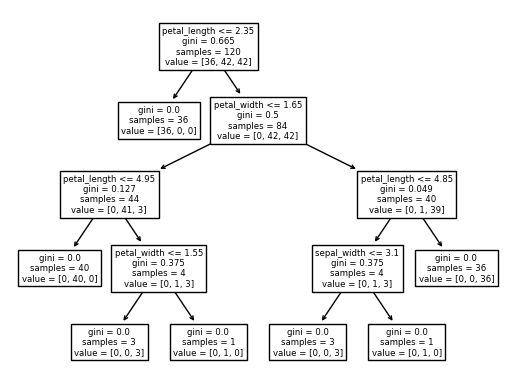

In [34]:
from sklearn import tree
tree.plot_tree(model,feature_names=x.columns)
plt.show()

In [36]:
#post pruning
ccp_alpha=model.cost_complexity_pruning_path(x_train,y_train)

In [39]:
ccp_alpha=ccp_alpha['ccp_alphas']

In [41]:
len(ccp_alpha)

6

In [43]:
ccp_alpha

array([0.        , 0.008125  , 0.0125    , 0.03409091, 0.28715909,
       0.315     ])

Building model and visualising with respect to CCP_ALPHA value= 0.0


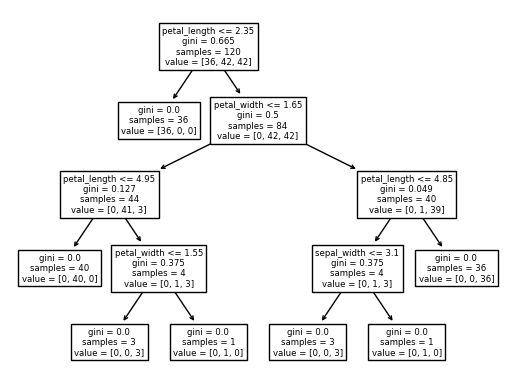

Building model and visualising with respect to CCP_ALPHA value= 0.008124999999999993


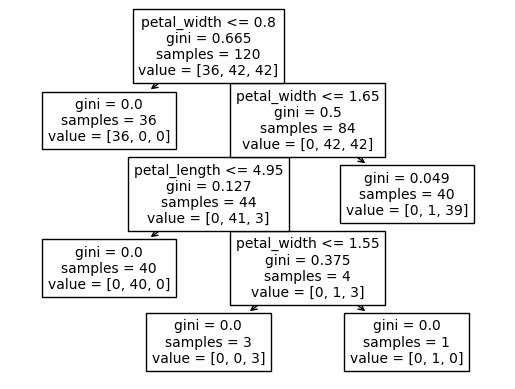

Building model and visualising with respect to CCP_ALPHA value= 0.0125


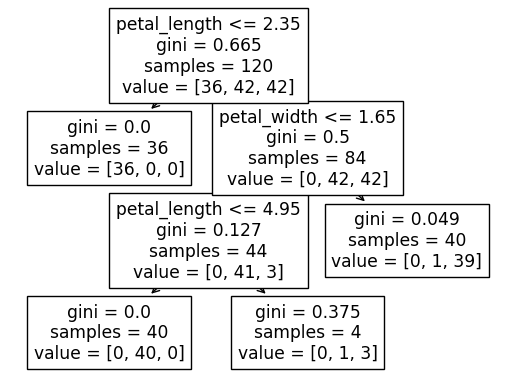

Building model and visualising with respect to CCP_ALPHA value= 0.034090909090909116


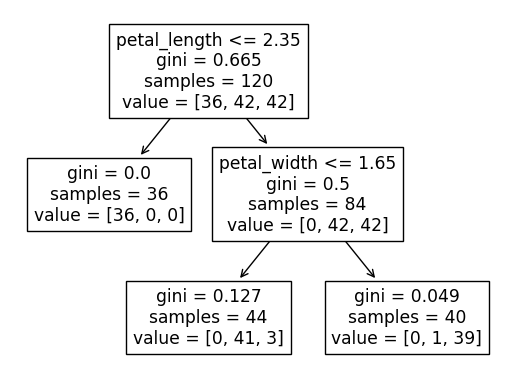

Building model and visualising with respect to CCP_ALPHA value= 0.28715909090909086


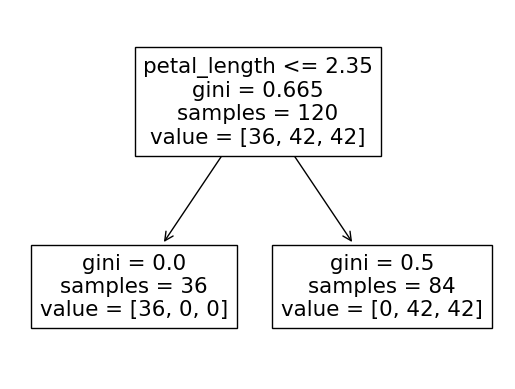

Building model and visualising with respect to CCP_ALPHA value= 0.31500000000000017


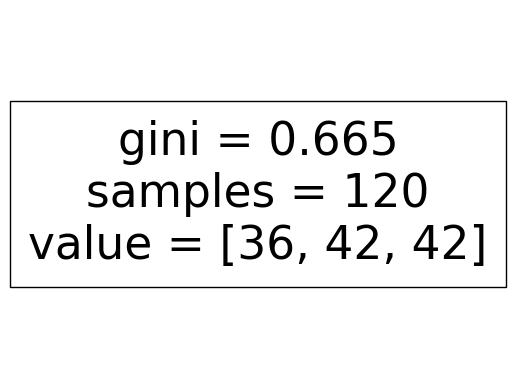

In [42]:
for alpha in ccp_alpha:
    print('Building model and visualising with respect to CCP_ALPHA value=',alpha)
    modelss=DecisionTreeClassifier(ccp_alpha=alpha).fit(x_train,y_train)
    tree.plot_tree(modelss,feature_names=x.columns)
    plt.show()

In [44]:
#collect the model with respect different ccp_alphas
model_1=[]
for i in ccp_alpha:
    modelss=DecisionTreeClassifier(ccp_alpha=i).fit(x_train,y_train)
    model_1.append(modelss)

In [74]:
train_accuracies=[]
for i in model_1:
    dtss=i
    predicted=dtss.predict(x_train)
    accuracy=accuracy_score(y_train,predicted)
    train_accuracies.append(accuracy)

In [75]:
train_accuracies

[1.0, 0.9916666666666667, 0.9833333333333333, 0.9666666666666667, 0.65, 0.35]

In [76]:
test_accuracy=[]
for i in model_1:
    dtss=i
    predicted=dtss.predict(x_test)
    accuracy=accuracy_score(y_test,predicted)
    test_accuracy.append(accuracy)


In [77]:
test_accuracy

[0.9333333333333333,
 0.9333333333333333,
 0.9666666666666667,
 0.9333333333333333,
 0.7333333333333333,
 0.26666666666666666]

In [78]:
#comparing test accuracies and train accuracy using a dataframe
final_dataframe=pd.DataFrame()
final_dataframe['ccp_alpha']=ccp_alpha
final_dataframe['train_accuracy']=train_accuracies
final_dataframe['test_accuracy']=test_accuracy

In [79]:
final_dataframe

,ccp_alpha,train_accuracy,test_accuracy
0,0.000000,1.000000,0.933333
1,0.008125,0.991667,0.933333
2,0.012500,0.983333,0.966667
3,0.034091,0.966667,0.933333
4,0.287159,0.650000,0.733333
5,0.315000,0.350000,0.266667


<Axes: xlabel='train_accuracy', ylabel='test_accuracy'>

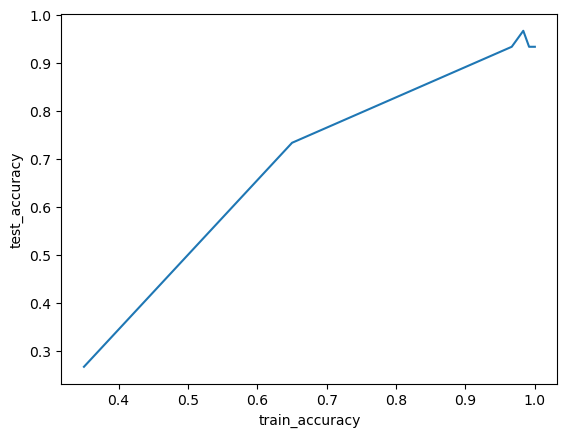

In [84]:
sns.lineplot(data=final_dataframe, x='train_accuracy',y='test_accuracy')

<Axes: xlabel='ccp_alpha'>

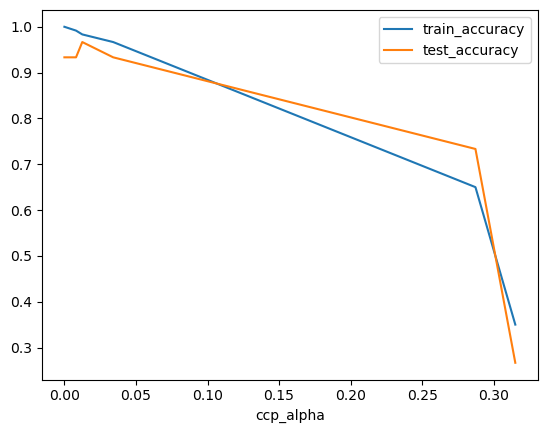

In [87]:
final_dataframe.plot(x='ccp_alpha',y=['train_accuracy','test_accuracy'])